## Loading the data

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Create your df here:

df = pd.read_csv("profiles.csv")

df.head()
len(df)

59946

## Data Exploration

In [83]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [84]:
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [85]:
df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [86]:
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [87]:
df.orientation.value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [88]:
df.smokes.value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

## Data Visualisation

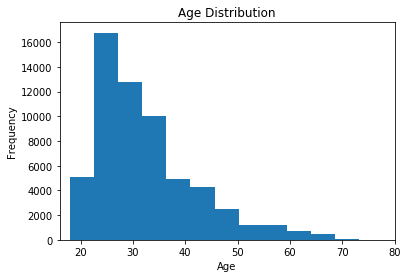

In [89]:
plt.hist(df.age, bins = 20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Age Distribution')
plt.xlim(16, 80)
plt.show()

## Mapping the data

In [90]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)

In [91]:
body_type_mapping = {"average": 0, "fit": 1, "athletic": 2, "thin": 3, "curvy": 4, "a little extra": 5, "skinny":6,"full figured": 7, "overweight": 8, "jacked": 9, "used up": 10, "rather not say" : 11 }
df["body_type_code"] = df.body_type.map(body_type_mapping)

In [92]:
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)

In [93]:
orientation_mapping = {"straight": '0', "gay": '1', "bisexual": '2'}
df["orientation_code"] = df.orientation.map(orientation_mapping)

In [94]:
smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)

In [95]:

essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)


df["essay_len"] = all_essays.apply(lambda x: len(x))




## Data Normalisation

In [96]:
feature_data_1 = df[['smokes_code', 'drinks_code', 'drugs_code', 'body_type_code', 'essay_len']]

x = feature_data_1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=feature_data_1.columns)

In [97]:
feature_data_1

,smokes_code,drinks_code,drugs_code,body_type_code,essay_len
0,1.0,2.0,0.0,5.0,2644
1,0.0,3.0,1.0,0.0,1453
2,0.0,2.0,NaN,3.0,5517
3,0.0,2.0,NaN,3.0,477
4,0.0,2.0,0.0,2.0,725
...,...,...,...,...,...
59941,0.0,2.0,0.0,NaN,1652
59942,0.0,3.0,1.0,1.0,2997
59943,0.0,0.0,0.0,0.0,1853
59944,4.0,2.0,2.0,2.0,1998


## Removing the NaNs

In [98]:

feature_data_1['drugs_code'] = feature_data_1['drugs_code'].replace(np.nan, 0, regex=True)

feature_data_1['smokes_code'] = feature_data_1['smokes_code'].replace(np.nan, 0, regex=True)

feature_data_1['drinks_code'] = feature_data_1['drinks_code'].replace(np.nan, 0, regex=True)

feature_data_1['body_type_code'] = feature_data_1['smokes_code'].replace(np.nan, 0, regex=True)

feature_data_1['essay_len'] = feature_data_1['drinks_code'].replace(np.nan, 0, regex=True)

df['orientation_code'] = df['orientation_code'].replace(np.nan, '0', regex=True)

/Users/carloscastillo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/carloscastillo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carloscastillo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A 

In [99]:
feature_data_1

,smokes_code,drinks_code,drugs_code,body_type_code,essay_len
0,1.0,2.0,0.0,1.0,2.0
1,0.0,3.0,1.0,0.0,3.0
2,0.0,2.0,0.0,0.0,2.0
3,0.0,2.0,0.0,0.0,2.0
4,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...
59941,0.0,2.0,0.0,0.0,2.0
59942,0.0,3.0,1.0,0.0,3.0
59943,0.0,0.0,0.0,0.0,0.0
59944,4.0,2.0,2.0,4.0,2.0


# Can we predict the sexual orientation of a user based on its body type, drugs, drinks and cigarettes consumption?


In [100]:
first_feature_set = feature_data_1[['smokes_code', 'drinks_code', 'drugs_code']]
first_label_set = df['orientation_code']

In [101]:
from sklearn.model_selection import train_test_split

#5 & 6
training_data, validation_data, training_labels, validation_labels = train_test_split(first_feature_set, first_label_set, train_size=0.8, test_size=0.2, random_state = 100)
print(training_data)
print(training_labels)


       smokes_code  drinks_code  drugs_code
16576          0.0          3.0         1.0
18128          0.0          2.0         0.0
41605          0.0          2.0         0.0
56377          4.0          2.0         0.0
33981          0.0          2.0         0.0
...            ...          ...         ...
12119          0.0          3.0         0.0
57191          0.0          2.0         0.0
14147          0.0          2.0         0.0
56088          0.0          2.0         0.0
38408          0.0          2.0         0.0

[47956 rows x 3 columns]
16576    0
18128    0
41605    0
56377    0
33981    0
        ..
12119    0
57191    0
14147    0
56088    0
38408    0
Name: orientation_code, Length: 47956, dtype: object


## Machine Learning - Naive Bayes Classifier

In [102]:
from sklearn.naive_bayes import MultinomialNB

# Predicting body type from smoke and drugs abuse using Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(training_data, training_labels.ravel())

print(classifier.score(validation_data, validation_labels))

0.8583819849874895


## Machine Learning - K-Nearest Neighbor

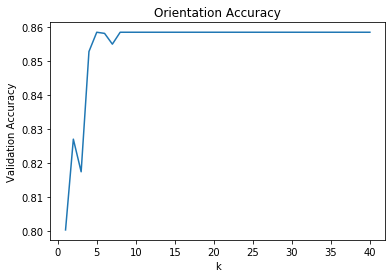

In [103]:
from sklearn.neighbors import KNeighborsClassifier
accuracies = []


for k in range(1,41):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels.ravel())
  accuracies.append(classifier.score(validation_data, validation_labels.ravel()))

k_list = range(1,41)

#16

plt.plot(k_list, accuracies)
plt.title("Orientation Accuracy")
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()
    

## Accuracy, Recall and Precision Score

In [104]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

classifier = KNeighborsClassifier(15)
classifier.fit(training_data, training_labels.ravel())
print(format(classifier.score(validation_data, validation_labels.ravel())))

print("accuracy score: %s" %accuracy_score(validation_labels.ravel(), classifier.predict(validation_data)))
print("recall score: %s" %recall_score(validation_labels.ravel(), classifier.predict(validation_data), average=None))
print("precision score: %s" %precision_score(validation_labels.ravel(), classifier.predict(validation_data), average=None))

0.858465387823186
accuracy score: 0.858465387823186
recall score: [1. 0. 0.]
precision score: [0.85846539 0.         0.        ]


/Users/carloscastillo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
classifier.classes_

array(['0', '1', '2'], dtype=object)

# Can we predict the body type of a user based on its drugs, drinks and cigarettes consumption?


## Creating new data frame

In [106]:
feature_data_2 = feature_data_1[['smokes_code', 'drinks_code', 'drugs_code']]
age_2 = df[["age"]]



In [107]:
features_data_2

,drinks_code,drugs_code,smokes_code
0,2.0,0.0,1.0
1,3.0,1.0,0.0
2,2.0,0.0,0.0
3,2.0,0.0,0.0
4,2.0,0.0,0.0
...,...,...,...
59941,2.0,0.0,0.0
59942,3.0,1.0,0.0
59943,0.0,0.0,0.0
59944,2.0,2.0,4.0


## ## Splitting the dataset

In [108]:

from sklearn.model_selection import train_test_split
training_data_2, validation_data_2, training_labels_2, validation_labels_2 = train_test_split(features_data_2, age_2, train_size=0.8, test_size=0.2, random_state = 100)
print(training_data_2)
print(training_labels_2)

       drinks_code  drugs_code  smokes_code
16576          3.0         1.0          0.0
18128          2.0         0.0          0.0
41605          2.0         0.0          0.0
56377          2.0         0.0          4.0
33981          2.0         0.0          0.0
...            ...         ...          ...
12119          3.0         0.0          0.0
57191          2.0         0.0          0.0
14147          2.0         0.0          0.0
56088          2.0         0.0          0.0
38408          2.0         0.0          0.0

[47956 rows x 3 columns]
       age
16576   39
18128   30
41605   28
56377   38
33981   27
...    ...
12119   29
57191   22
14147   21
56088   36
38408   23

[47956 rows x 1 columns]


## Regression Techniques - Linear regression

training set score: 0.025566484670395906
test set score: 0.026525796815229485


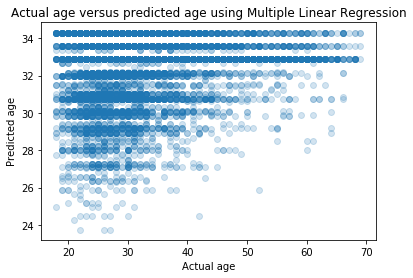

In [109]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(training_data_2, training_labels_2)

regr_training_score = regr.score(training_data_2, training_labels_2)

print("training set score: %s" %regr_training_score)

regr_test_score = regr.score(validation_data_2, validation_labels_2)

print("test set score: %s" %(regr_test_score))

#generate plot showing difference between predicted age and actual age using Multiple Linear Regression model

regr_predictions = regr.predict(validation_data_2)

plt.scatter(validation_labels_2, regr_predictions, alpha=0.2)
plt.title("Actual age versus predicted age using Multiple Linear Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

## Regression Techniques - K-Nearest Neighbor regression mode

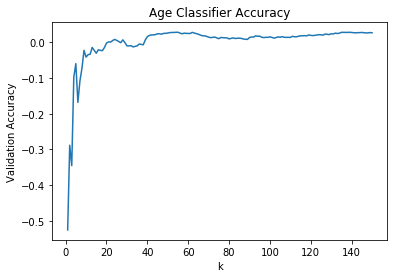

In [110]:
from sklearn.neighbors import KNeighborsRegressor




k_list = range(1, 151)
scores = []
for k in k_list:
    # Create a K-Neighbor Classifier
    regressor = KNeighborsRegressor (n_neighbors = k)

    # Train using training dataset
    regressor.fit(training_data_2, training_labels_2)

    y_pred = regressor.predict(validation_data_2)
    
    scores.append(regressor.score(training_data_2, training_labels_2))

# Plot "k" vs "accuracy"
plt.plot(k_list, scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Age Classifier Accuracy')
plt.show()



